# TASK 2: CUSTOMER CHURN PREDICTION

## When it comes to useful business applications of machine learning, it doesn’t get much better than customer churn prediction. It’s a problem where you usually have a lot of high-quality, fresh data to work with, it’s relatively straightforward, and solving it can be a great way to increase profits.

## Churn rate is a critical metric of customer satisfaction. Low churn rates mean happy customers; high churn rates mean customers are leaving you.

# What is churn rate?

churn rate (also called attrition rate) measures the number of individuals or items moving out of a collective group over a specific period. It applies in many contexts, but the mainstream understanding of churn rate is related to the business case of customers that stop buying from you.

## This end-to-end project delves into the realm of SUPERVISED MACHINE LEARNING to accurately classify customer churn rate and helps implementing effective strategies for customer retention

# IMPORTING LIBRARIES

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv("C:/Users/Sharmeen/Downloads/Customer_Churn.csv")

In [108]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# DATA PREPROCESSING(DEALING WITH NULL VALUES)

In [109]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# EXPLORATIVE DATA ANALYSIS OF NUMERICAL AND CATEGORICAL VARIABLES

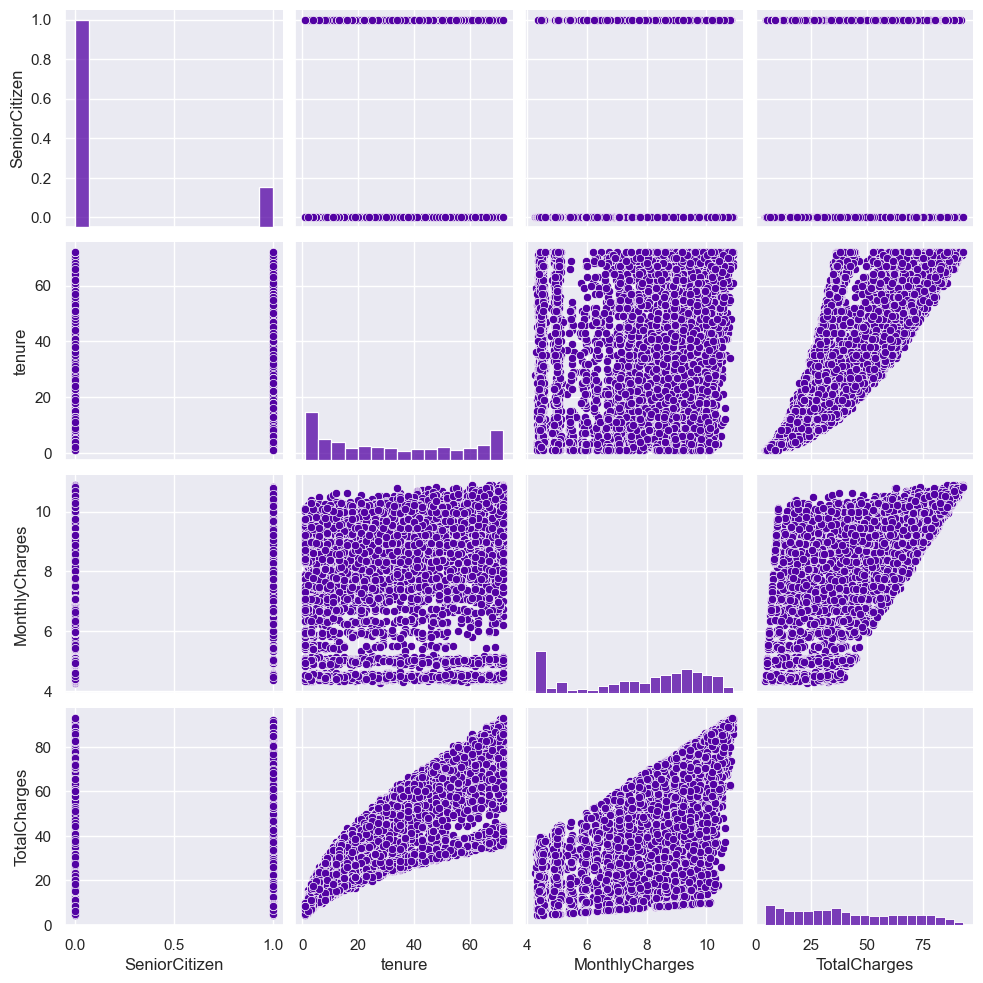

In [168]:
sns.set_palette("plasma")
sns.pairplot(df, kind='scatter')

In [110]:
#EXPLORING CATEGORICAL COLUMNS
df.gender.value_counts(dropna=False)

Male      3555
Female    3488
Name: gender, dtype: int64

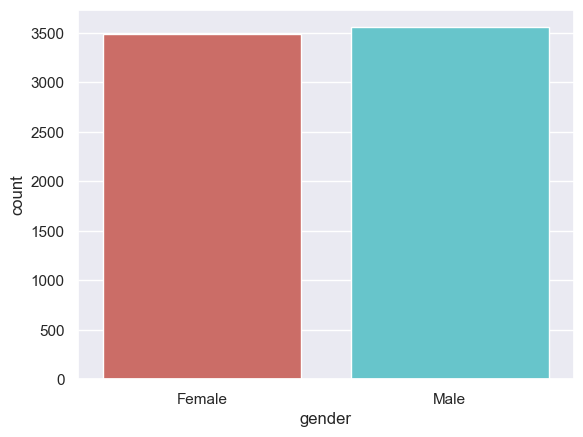

In [111]:
import seaborn as sns
sns.countplot(x="gender", data=df, palette="hls")
plt.show()

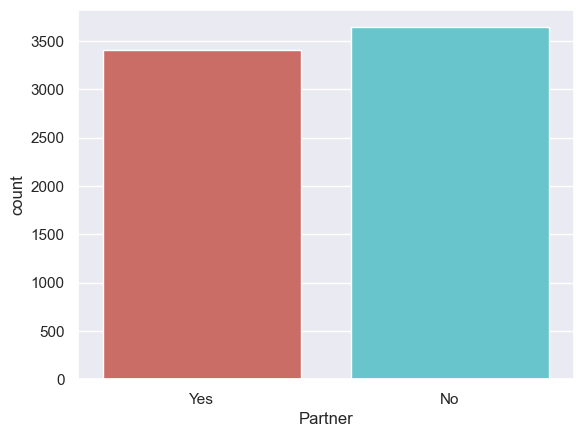

In [112]:
sns.countplot(x="Partner", data=df, palette="hls")
plt.show()

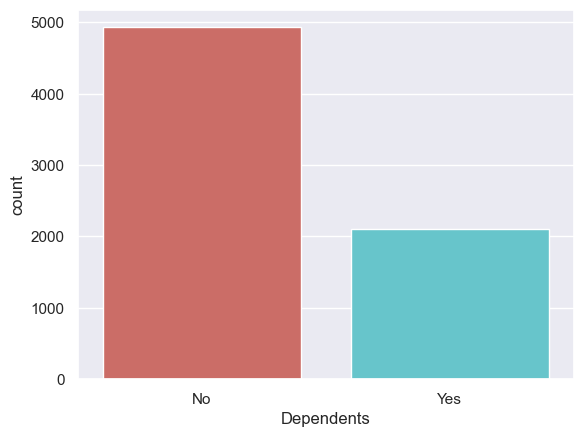

In [113]:
sns.countplot(x="Dependents", data=df, palette="hls")
plt.show()

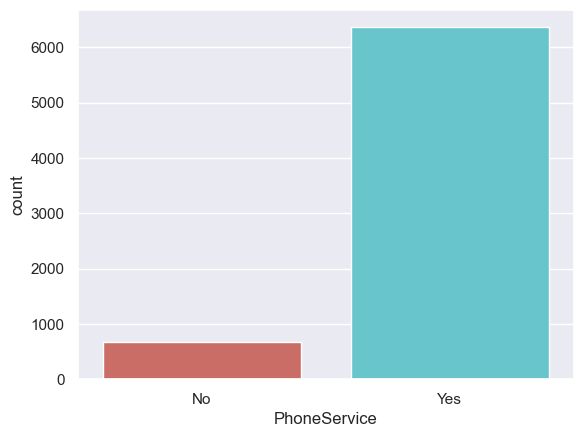

In [114]:
sns.countplot(x="PhoneService", data=df, palette="hls")
plt.show()

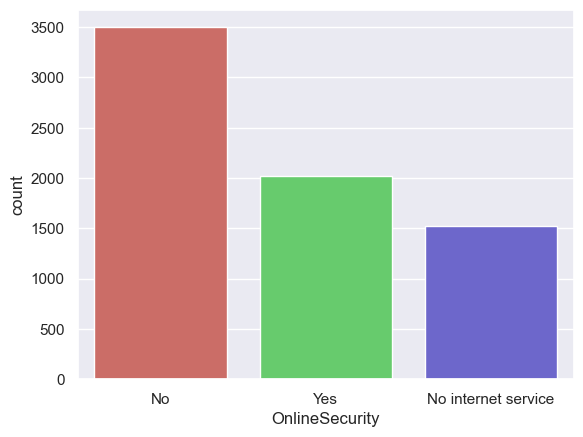

In [115]:
sns.countplot(x="OnlineSecurity", data=df, palette="hls")
plt.show()

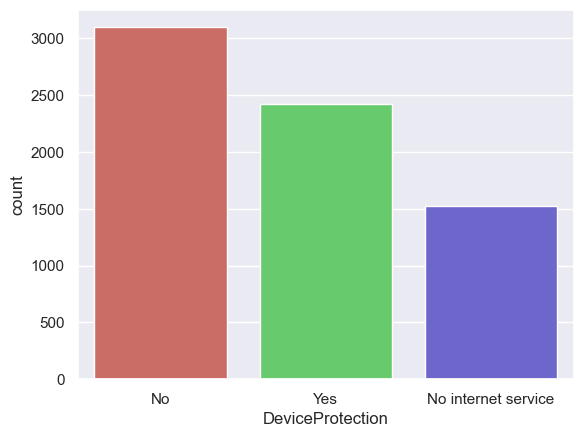

In [116]:
sns.countplot(x="DeviceProtection", data=df, palette="hls")
plt.show()

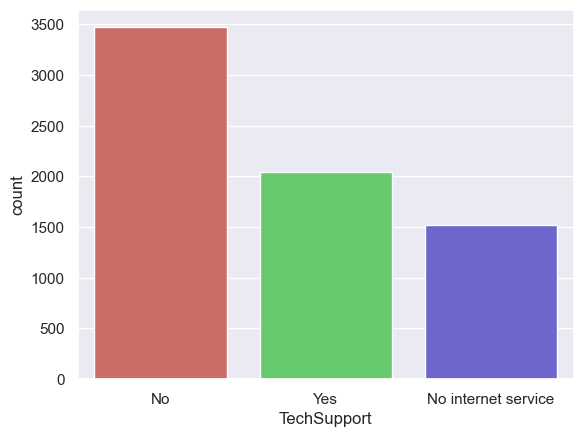

In [117]:
sns.countplot(x="TechSupport", data=df, palette="hls")
plt.show()

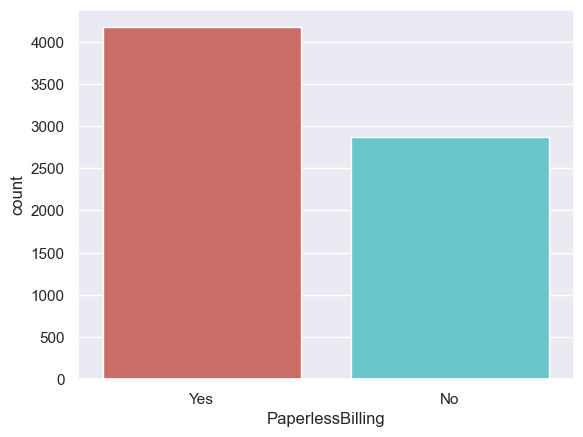

In [118]:
sns.countplot(x="PaperlessBilling", data=df, palette="hls")
plt.show()

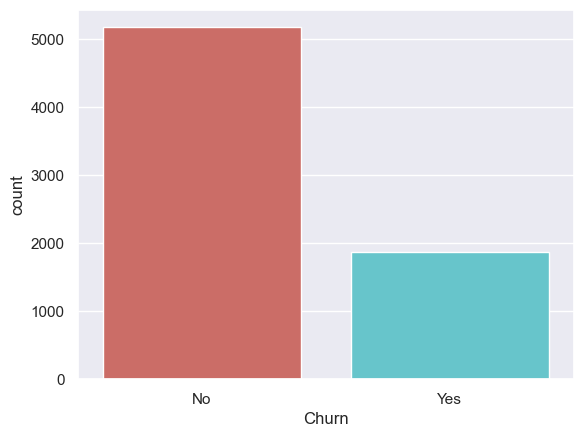

In [119]:
sns.countplot(x="Churn", data=df, palette="hls")
plt.show()

In [120]:
countY = len(df[df.Churn == 'Yes'])
countN = len(df[df.Churn == 'No'])
countNull = len(df[df.Churn.isnull()])

print("Percentage of Churned: {:.2f}%".format((countY / (len(df.Churn))*100)))
print("Percentage of Not Churned: {:.2f}%".format((countN / (len(df.Churn))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Churn))*100)))

Percentage of Churned: 26.54%
Percentage of Not Churned: 73.46%
Missing values percentage: 0.00%


In [121]:
df.tenure.value_counts(dropna=False)

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

It can be seen that maximum customers staying with the company for 1 month is the most highest i.e the tenure rate is significantly high

In [122]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [123]:
# Replace empty strings with NaN
df['TotalCharges'].replace(' ', np.nan, inplace=True)

In [124]:
df.TotalCharges.value_counts(dropna=False)

NaN       11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [125]:
# Drop NaN values from 'TotalCharges' column
df['TotalCharges'].dropna(inplace=True)

In [126]:
df.TotalCharges.value_counts

<bound method IndexOpsMixin.value_counts of 0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object>

In [127]:
# Convert 'TotalCharges' column to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Round 'TotalCharges' column to two decimal places
df['TotalCharges'] = df['TotalCharges'].round(2)

In [128]:
# Replace non-finite values with NaN
df['TotalCharges'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop NaN values from 'TotalCharges' column
df['TotalCharges'].dropna(inplace=True)

In [129]:
df.TotalCharges.value_counts

<bound method IndexOpsMixin.value_counts of 0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64>

In [130]:
# Convert 'TotalCharges' column to integer
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [131]:
#DESCRIBING NUMERICAL VARIABLES
df[['TotalCharges','tenure','MonthlyCharges']].describe()

,TotalCharges,tenure,MonthlyCharges
count,7032.000000,7043.000000,7043.000000
mean,2283.300441,32.371149,64.761692
std,2266.771362,24.559481,30.090047
min,18.800000,0.000000,18.250000
25%,401.450000,9.000000,35.500000
50%,1397.475000,29.000000,70.350000
75%,3794.737500,55.000000,89.850000
max,8684.800000,72.000000,118.750000


# EXAMINING NUMERICAL VARIABLES WITH HISTOGRAM

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

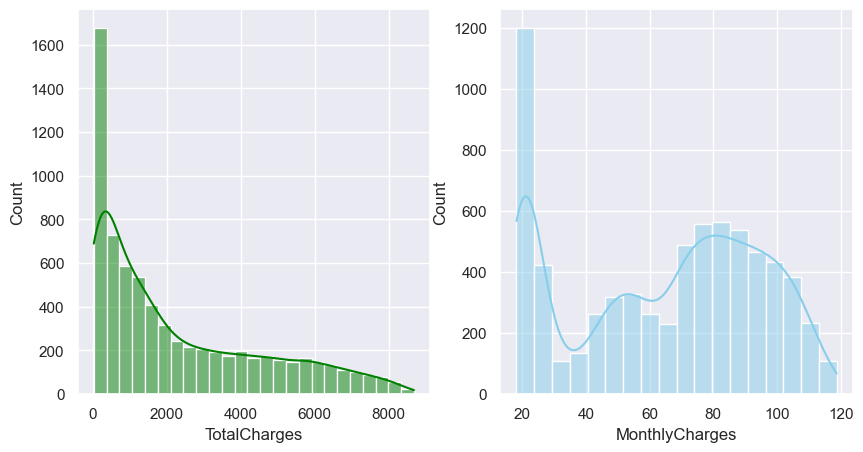

In [132]:
#distribution of the same using histogram
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=df, x="TotalCharges", kde=True, ax=axs[0], color='green')
sns.histplot(data=df, x="MonthlyCharges", kde=True, ax=axs[1], color='skyblue')

# SKEWED DISTRIBUTION TREATMENT WITH SQ.ROOT TRANSFORMATION FOR NORMALIZING THE DISTRIBUTION

Since TotalCharges is almost right skewed, we'll normalize the data with square-root transformation for easy interpretation

In [133]:
#SKEWED DISTRIBUTION TREATMENT
# Square Root Transformation for normalizing distribution

df.TotalCharges = np.sqrt(df.TotalCharges)
df.MonthlyCharges = np.sqrt(df.MonthlyCharges)

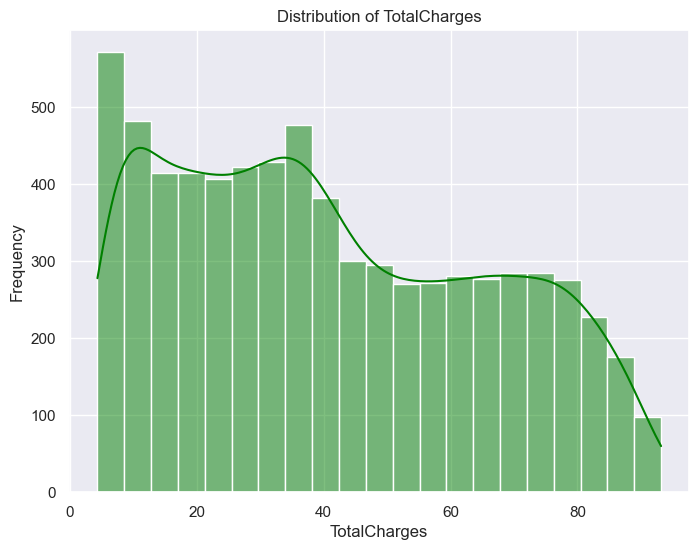

In [134]:
# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="TotalCharges", kde=True, color='green')
plt.title('Distribution of TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.show()

# EXAMINING OUTLIERS WITH BOXPLOT

<Axes: >

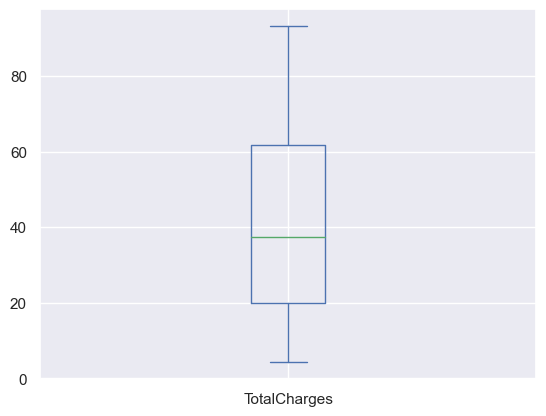

In [135]:
#EXAMINING FOR OUTLIERS WITH BOXPLOT
df['TotalCharges'].plot(kind='box')

<Axes: >

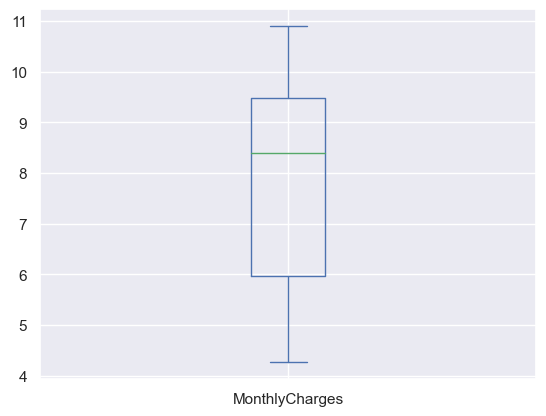

In [136]:
df['MonthlyCharges'].plot(kind='box')

### No outliers can be seen

# CORRELATION MATRIX FOR SELECTION OF REQUIRED ATTRIBUTES WITH HIGH CORRELATTION

C:\Users\Sharmeen\AppData\Local\Temp\ipykernel_19500\694334595.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



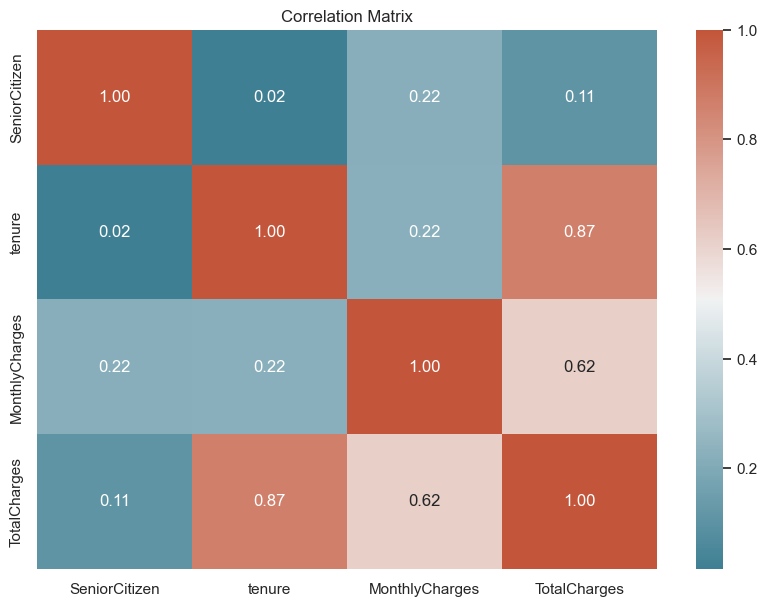

In [137]:
#now we will go to other exploration methods
#we will do bi-variate analysis(categorical w/ categorical, categorical w/ numerical numerical w/ numerical)
plt.figure(figsize=(10,7))
# Define the color map
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap,fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

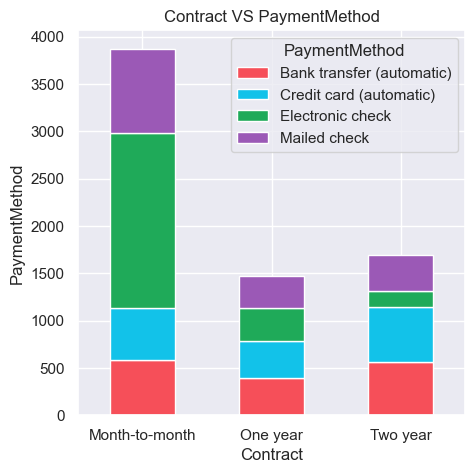

In [138]:
#CATEGORICAL VS CATEGORICAL
pd.crosstab(df.Contract,df.PaymentMethod).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9','#1faa59','#9b59b6'])
plt.title('Contract VS PaymentMethod')
plt.xlabel('Contract')
plt.ylabel('PaymentMethod')
plt.xticks(rotation=0)
plt.show()

In [139]:
# Drop rows with missing values from 'TotalCharges' column
df.dropna(subset=['TotalCharges'], inplace=True)

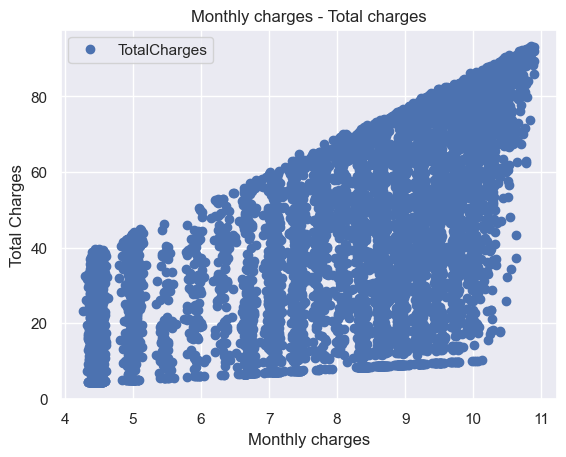

Pearson correlation: 0.619638879324005
T Test and P value: 
 TtestResult(statistic=-113.1068743263217, pvalue=0.0, df=14062.0)


In [140]:
#NUMERICAL VS NUMERICAL
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
df.plot(x='MonthlyCharges', y='TotalCharges', style='o')  
plt.title('Monthly charges - Total charges')  
plt.xlabel('Monthly charges')
plt.ylabel('Total Charges')  
plt.show()
print('Pearson correlation:', df['MonthlyCharges'].corr(df['TotalCharges']))
print('T Test and P value: \n', stats.ttest_ind(df['MonthlyCharges'], df['TotalCharges']))

In [141]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [142]:
#dropping cust id which is not required
df1 = df.drop(["customerID"], axis=1)

In [143]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,5.463515,5.463515,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,7.546522,43.468379,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,7.338256,10.399519,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),6.503845,42.903963,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,8.408329,12.314625,Yes


# ONE-HOT ENCODING FOR TRANSFORMING CATEGORICAL TO NUMERIC FEATURES FOR MODEL INTERPRETABILITY AND UNDERSTANDING IN MACHINE LEARNING

In [144]:
#ONE HOT ENCODING FOR CATEGORICAL VARIABLES
df1=pd.get_dummies(df1)

In [145]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,5.463515,5.463515,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,7.546522,43.468379,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,7.338256,10.399519,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,6.503845,42.903963,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,8.408329,12.314625,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


# SMOTE TECHNIQUE FOR RESAMPLING THE VARIABLE OF TARGET COLUMN "CHURN" WHICH IS OVERSAMPLED IN ONE CATEGORY

In [146]:
from imblearn.over_sampling import SMOTE

# Assuming X contains your features and y contains the target variable columns "Churn_No" and "Churn_Yes"
X = df1.drop(columns=['Churn_No', 'Churn_Yes'])
y = df1['Churn_Yes']  # Selecting only one of the binary encoded columns as the target variable

# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE to balance the binary classes
X_resampled, y_resampled = smote.fit_resample(X, y)

In [147]:
# Check the balance of the resampled target variable
print(y_resampled.value_counts())

0    5163
1    5163
Name: Churn_Yes, dtype: int64


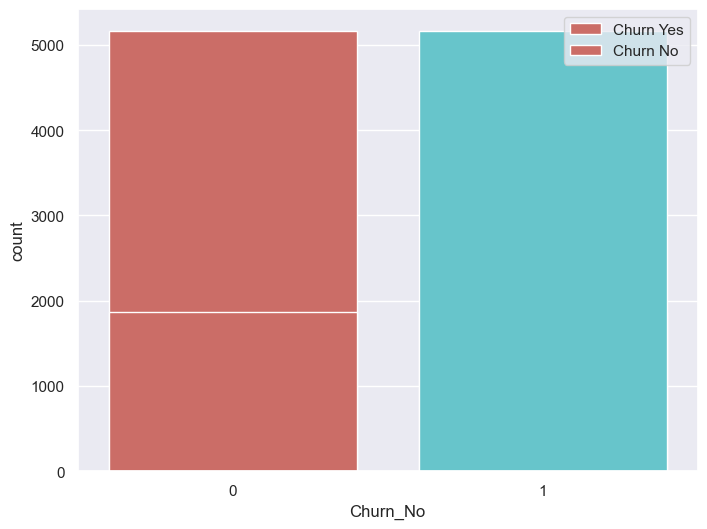

In [150]:
# Plot count of Churn_Yes
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn_Yes', data=df1, palette="hls", label='Churn Yes')

# Plot count of Churn_No
sns.countplot(x='Churn_No', data=df1, palette="hls", label='Churn No')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [95]:
df1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer__automatic_,PaymentMethod_Credit_card__automatic_,PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,Churn_No,Churn_Yes
0,0,1,5.463515,5.463515,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,7.546522,43.468379,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,7.338256,10.399519,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,6.503845,42.903963,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,8.408329,12.314625,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,9.208692,44.615020,0,1,0,1,0,1,...,1,0,0,1,0,0,0,1,1,0
7039,0,72,10.158740,85.807342,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
7040,0,11,5.440588,18.613167,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
7041,1,4,8.625543,17.509997,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1


# CORRELATION MATRIX AFTER ONE-HOT ENCODING AND SMOTE FOR ALL THE VARIABLES

In [96]:
import plotly.express as px
# Checking the correlation between features
corr = df1.corr()

fig = px.imshow(corr,width=1000, height=1000)
fig.show()

### Scaling of features range so that each feature contributes proportionately to the final outcome

In [151]:
from sklearn.preprocessing import StandardScaler
X = df1.drop(columns=['Churn_No', 'Churn_Yes'])
y = df1['Churn_Yes']
X = StandardScaler().fit_transform(X)

### SPLITTING TRAIN AND TEST DATA

In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

# MODEL BUILDING

In [153]:
#STARTING WITH LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

LRclassifier = LogisticRegression(solver='saga', penalty = 'l2',C=1, max_iter=900, random_state=42)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

[[932 101]
 [189 185]]
LR accuracy: 79.39%


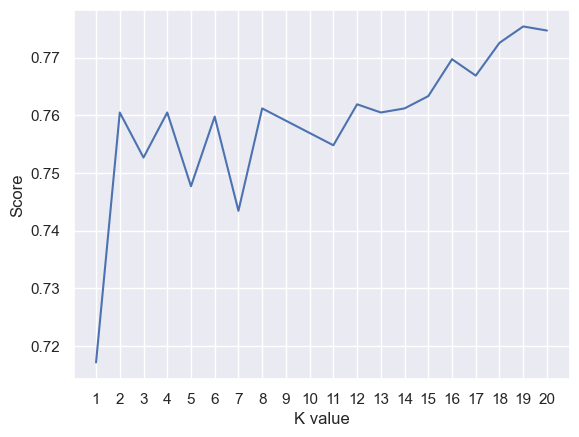

KNN best accuracy: 77.54%


In [154]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [160]:
y_pred = KNclassifier.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report for KNN:\n", report)
print(confusion_matrix(y_test,y_pred))
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.52      0.55       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.77      0.77      1407

[[896 137]
 [180 194]]
KNN best accuracy: 77.54%


In [155]:
#SVM
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='rbf',gamma=5,C=0.001, max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

C:\Users\Sharmeen\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning:

Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



              precision    recall  f1-score   support

           0       0.76      0.96      0.85      1033
           1       0.60      0.16      0.25       374

    accuracy                           0.75      1407
   macro avg       0.68      0.56      0.55      1407
weighted avg       0.72      0.75      0.69      1407

[[993  40]
 [314  60]]
SVC accuracy: 74.84%


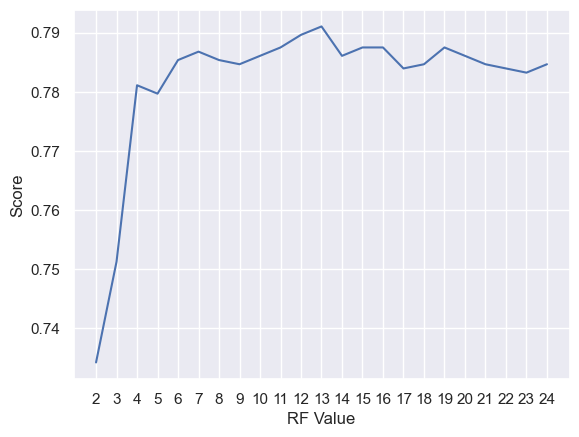

Random Forest Accuracy:  79.10%


In [156]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 800, max_depth=15, min_samples_split=5,random_state = 52, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [157]:
y_pred = RFclassifier.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report for Random Forest:\n", report)
print(confusion_matrix(y_test,y_pred))
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.44      0.52       374

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407

[[938  95]
 [208 166]]
Random Forest Accuracy:  79.10%


# MODEL EVALUATION RESULTS AND VISUALIZATION

In [158]:
#MODEL COMPARISON FINAL CHART
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM','Random Forest'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,79.388770
3,Random Forest,79.104478
1,K Neighbors,77.540867
2,SVM,74.840085


## As clearly seen, Logistic Regression proves to be the most accurate model with highest accuracy to predict churn

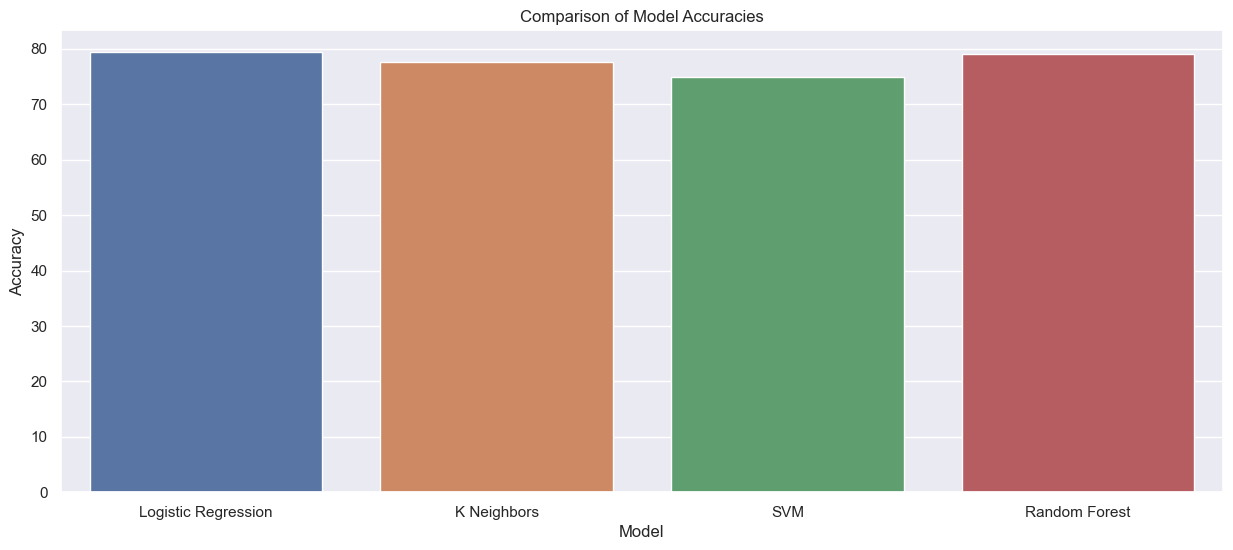

In [159]:
#EVALUATING RESULTS WITH VISUALIZATION
plt.figure(figsize=(15, 6))  

# Create the bar plot
sns.barplot(x=compare['Model'], y=compare['Accuracy'])

# Add labels and titles 
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Show the plot
plt.show()

# RECOMMENDATIONS TO CUSTOMER VIA EMAIL

In [171]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

In [175]:
def send_email(receiver_email, churn_status):
    # Your SMTP server details
    smtp_server = 'smtp.gmail.com'
    smtp_port = 587
    smtp_username = 'shaikhsharmin857@gmail.com'
    smtp_password = 'fwzz saap psmm twqr'
    
    # Email content
    sender_email = 'shaikhsharmin857@gmail.com'
    subject = 'Personalized Recommendation'
    
    if churn_status == 'Churn':
        message_body = 'Dear customer,\n\nWe noticed that you recently churned from our service. We would love to hear your feedback and offer you a special discount to come back and give us another try.'
    else:
        message_body = 'Dear customer,\n\nThank you for your continued loyalty to our service. As a token of appreciation, we would like to offer you a special discount on your next purchase.'
    
    # Create message
    message = MIMEMultipart()
    message['From'] = sender_email
    message['To'] = receiver_email
    message['Subject'] = subject
    message.attach(MIMEText(message_body, 'plain'))
    
    # Connect to SMTP server and send email
    try:
        server = smtplib.SMTP(smtp_server, smtp_port)
        server.starttls()
        server.login(smtp_username, smtp_password)
        server.sendmail(sender_email, receiver_email, message.as_string())
        server.quit()
        print('Email sent successfully!')
    except Exception as e:
        print('Error sending email:', str(e))

In [176]:
#example of use
send_email('shaikhsharmin857@gmail.com','Churn')

Email sent successfully!


In [177]:
send_email('shaikhsharmin857@gmail.com','Not Churn')

Email sent successfully!


# CONCLUSION

- In conclusion, this project focused on customer churn prediction in the telecom industry, aiming to identify factors influencing customer retention and provide actionable recommendations to reduce churn.

- Through exploratory data analysis, feature engineering, and machine learning model development, we successfully built predictive models to predict customer churn with high accuracy.

- By leveraging these models, businesses can proactively identify at-risk customers, tailor retention strategies, and ultimately improve customer satisfaction and loyalty. 

- Moving forward, continuous monitoring of churn metrics and adaptation of retention strategies based on evolving customer needs will be crucial for maintaining a competitive edge in the telecom market.